In [46]:
import tensorflow as tf
print(tf.__version__)

2.16.1


# IMPORTING LIBRARIES

In [47]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# DATA PREPROCESSING

### TRAINING IMAGE PREPROCESSING

In [48]:
## USING KERAS
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### VALIDATION IMAGE PREPROCESSING

In [49]:
## USING KERAS
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [50]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [51]:
for x,y in training_set:                               ## STRUCTURE OF OUR TRAINING SET
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[143.   139.   140.  ]
   [147.75 143.75 144.75]
   [140.25 136.25 137.25]
   ...
   [135.75 133.75 138.75]
   [135.75 133.75 138.75]
   [132.5  130.5  135.5 ]]

  [[145.75 141.75 142.75]
   [140.25 136.25 137.25]
   [146.75 142.75 143.75]
   ...
   [134.5  132.5  137.5 ]
   [134.75 132.75 137.75]
   [131.25 129.25 134.25]]

  [[135.25 131.25 132.25]
   [143.   139.   140.  ]
   [144.5  140.5  141.5 ]
   ...
   [132.25 130.25 135.25]
   [138.   136.   141.  ]
   [137.5  135.5  140.5 ]]

  ...

  [[100.75  90.75  89.75]
   [ 94.5   84.5   83.5 ]
   [ 91.5   81.5   80.5 ]
   ...
   [112.25 102.25 101.25]
   [110.5  100.5   99.5 ]
   [108.5   98.5   97.5 ]]

  [[101.25  91.25  90.25]
   [ 97.5   87.5   86.5 ]
   [100.5   90.5   89.5 ]
   ...
   [100.25  90.25  89.25]
   [103.    93.    92.  ]
   [104.25  94.25  93.25]]

  [[ 98.25  88.25  87.25]
   [102.    92.    91.  ]
   [101.75  91.75  90.75]
   ...
   [104.5   94.5   93.5 ]
   [102.    92.    91.  ]
   [ 94.25  84.25  8

### TO AVOID OVERSHOOTING
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of underfitting , so increase number of neuron
3. Add more convolution layer to extract more feature from images 

# MODEL BUILDING

In [52]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout     #Dropout is added newly
from tensorflow.keras.models import Sequential

In [53]:
model = Sequential()

In [54]:
## BUILDING CONVOLUTION LAYER

In [55]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))        
#model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))    #old line 
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))   # padding is removed because input is coming in first layer and size of the image remain same , one layer image is not used as another layer image input , so if we add padding here it slow down our training .
model.add(MaxPool2D(pool_size=2,strides=2))

In [56]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [57]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [58]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [59]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))     #Add more convolution layer to extract more feature from images
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [60]:
model.add(Dropout(0.25))        #we are adding Dropout layer 25%         #Avoiding overfitting

In [61]:
model.add(Flatten())

In [62]:
#model.add(Dense(units=1024,activation='relu'))            #Increasing no. of neuron from 1024 to 1500    
model.add(Dense(units=1500,activation='relu'))

In [63]:
model.add(Dropout(0.4))  #we are adding more 40% Dropout  #Avoiding overfitting

In [64]:
#OUTPUT LAYER
model.add(Dense(units=38,activation='softmax'))

# COMPILING MODEL

In [65]:
## model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])      (old line <->giving high loss , newline<->small learning rate ) )
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001) ,loss='categorical_crossentropy',metrics=['accuracy'])               

In [66]:
#before adjusting our overshooting  , Total params:65MB , Trainable params:65MB , Non-trainable params:0 byte
#after adjusting our overshooting , all values should came up less
model.summary()              

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

# TRAINING MODEL

In [68]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=15)

Epoch 1/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1268s 577ms/step - accuracy: 0.3971 - loss: 2.1353 - val_accuracy: 0.8403 - val_loss: 0.5142
Epoch 2/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1247s 567ms/step - accuracy: 0.8292 - loss: 0.5399 - val_accuracy: 0.8926 - val_loss: 0.3299
Epoch 3/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1237s 563ms/step - accuracy: 0.9038 - loss: 0.3025 - val_accuracy: 0.9307 - val_loss: 0.2140
Epoch 4/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1234s 562ms/step - accuracy: 0.9334 - loss: 0.2077 - val_accuracy: 0.9516 - val_loss: 0.1501
Epoch 5/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1213s 552ms/step - accuracy: 0.9520 - loss: 0.1448 - val_accuracy: 0.9361 - val_loss: 0.2040
Epoch 6/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1219s 555ms/step - accuracy: 0.9620 - loss: 0.1157 - val_accuracy: 0.9524 - val_loss: 0.1480
Epoch 7/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1215s 553ms/step - accuracy: 0.9689 - loss: 0.0915 - val_accuracy: 0.9523 - val_loss: 0.1638
Epoch 8/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1221s 556ms/s

# MODEL EVALUATION

In [69]:
#MODEL EVALUATION ON TRAINING SET
train_loss,train_acc= model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 302s 138ms/step - accuracy: 0.9907 - loss: 0.0270


In [70]:
print(train_loss,train_acc)

0.02486300840973854 0.9918344020843506


In [71]:
#MODEL EVALUATION ON VALIDATION SET
val_loss,val_acc= model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 73s 132ms/step - accuracy: 0.9635 - loss: 0.1245


In [72]:
print(val_loss,val_acc)

0.12455551326274872 0.9637491703033447


# SAVING MODEL

In [74]:
model.save("trained_model.keras")

In [75]:
training_history.history

{'accuracy': [0.5921473503112793,
  0.8552955389022827,
  0.9128103256225586,
  0.9391421675682068,
  0.9550039172172546,
  0.9653887152671814,
  0.9709510207176208,
  0.9743651747703552,
  0.9799985885620117,
  0.9811366200447083,
  0.9841951727867126,
  0.9851198792457581,
  0.9859591722488403,
  0.9879934787750244,
  0.9878654479980469],
 'loss': [1.3829325437545776,
  0.453512042760849,
  0.273639976978302,
  0.18828153610229492,
  0.1368027925491333,
  0.10611312836408615,
  0.08528531342744827,
  0.07856716215610504,
  0.06331899762153625,
  0.05798134580254555,
  0.04977303743362427,
  0.04638110101222992,
  0.043883442878723145,
  0.03832285851240158,
  0.037465717643499374],
 'val_accuracy': [0.8403141498565674,
  0.892556369304657,
  0.9306851625442505,
  0.9515706896781921,
  0.9360914826393127,
  0.9523674249649048,
  0.9523105025291443,
  0.968643307685852,
  0.9697814583778381,
  0.9569200873374939,
  0.956009566783905,
  0.9622695446014404,
  0.9622126221656799,
  0.9714

# RECORDING MODEL HISTORY IN JSON

In [76]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

# ACCURACY VISUALIZATION

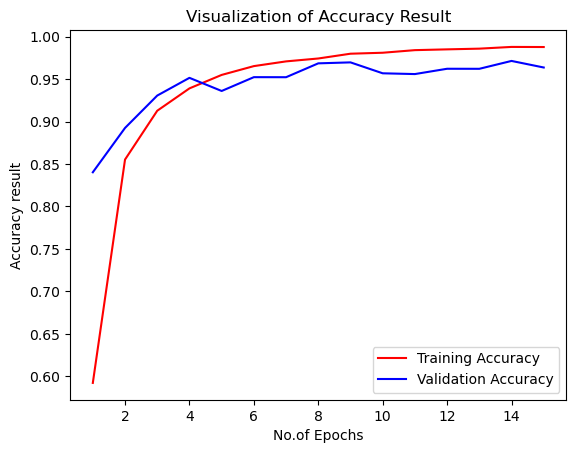

In [78]:
epochs=[i for i in range(1,16)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No.of Epochs")
plt.ylabel("Accuracy result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## SOME OTHER METRICS FOR MODEL EVALUATION

In [79]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [80]:
test_set= tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [81]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 73s 133ms/step


(array([[9.9994028e-01, 6.3510930e-07, 1.5926945e-07, ..., 2.3053013e-09,
         2.4402258e-09, 1.6610867e-08],
        [9.9999559e-01, 3.8597095e-06, 1.3898604e-09, ..., 2.5660396e-14,
         7.5528472e-11, 1.9218273e-10],
        [9.9999356e-01, 1.1230476e-08, 7.8549015e-11, ..., 9.4777947e-16,
         6.6477217e-13, 6.8913586e-12],
        ...,
        [2.5644117e-14, 8.7117057e-18, 6.8362319e-13, ..., 1.3121359e-15,
         8.1221005e-16, 1.0000000e+00],
        [9.0853762e-13, 2.0391696e-17, 1.0323380e-11, ..., 1.8736286e-14,
         1.1870952e-14, 1.0000000e+00],
        [4.4981468e-16, 9.5345573e-19, 4.3971522e-15, ..., 1.3518501e-18,
         1.1290107e-15, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [82]:
predicted_categories=tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [83]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [84]:
y_true=tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [85]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.92      0.95       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.95      0.98      0.96       440
                                   Apple___healthy       0.94      0.98      0.96       502
                               Blueberry___healthy       0.99      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.84      0.90       410
                       Corn_(maize)___Common_rust_       0.99      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.88      0.98      0.

In [86]:
cm=confusion_matrix(y_true,predicted_categories)
cm,cm.shape

(array([[463,   8,   0, ...,   0,   0,   0],
        [  0, 494,   1, ...,   0,   0,   0],
        [  1,   0, 431, ...,   0,   0,   1],
        ...,
        [  0,   0,   0, ..., 478,   0,   0],
        [  0,   0,   3, ...,   0, 432,   1],
        [  0,   0,   0, ...,   0,   0, 479]], dtype=int64),
 (38, 38))

# CONFUSION MATRIX VISUALIZATION

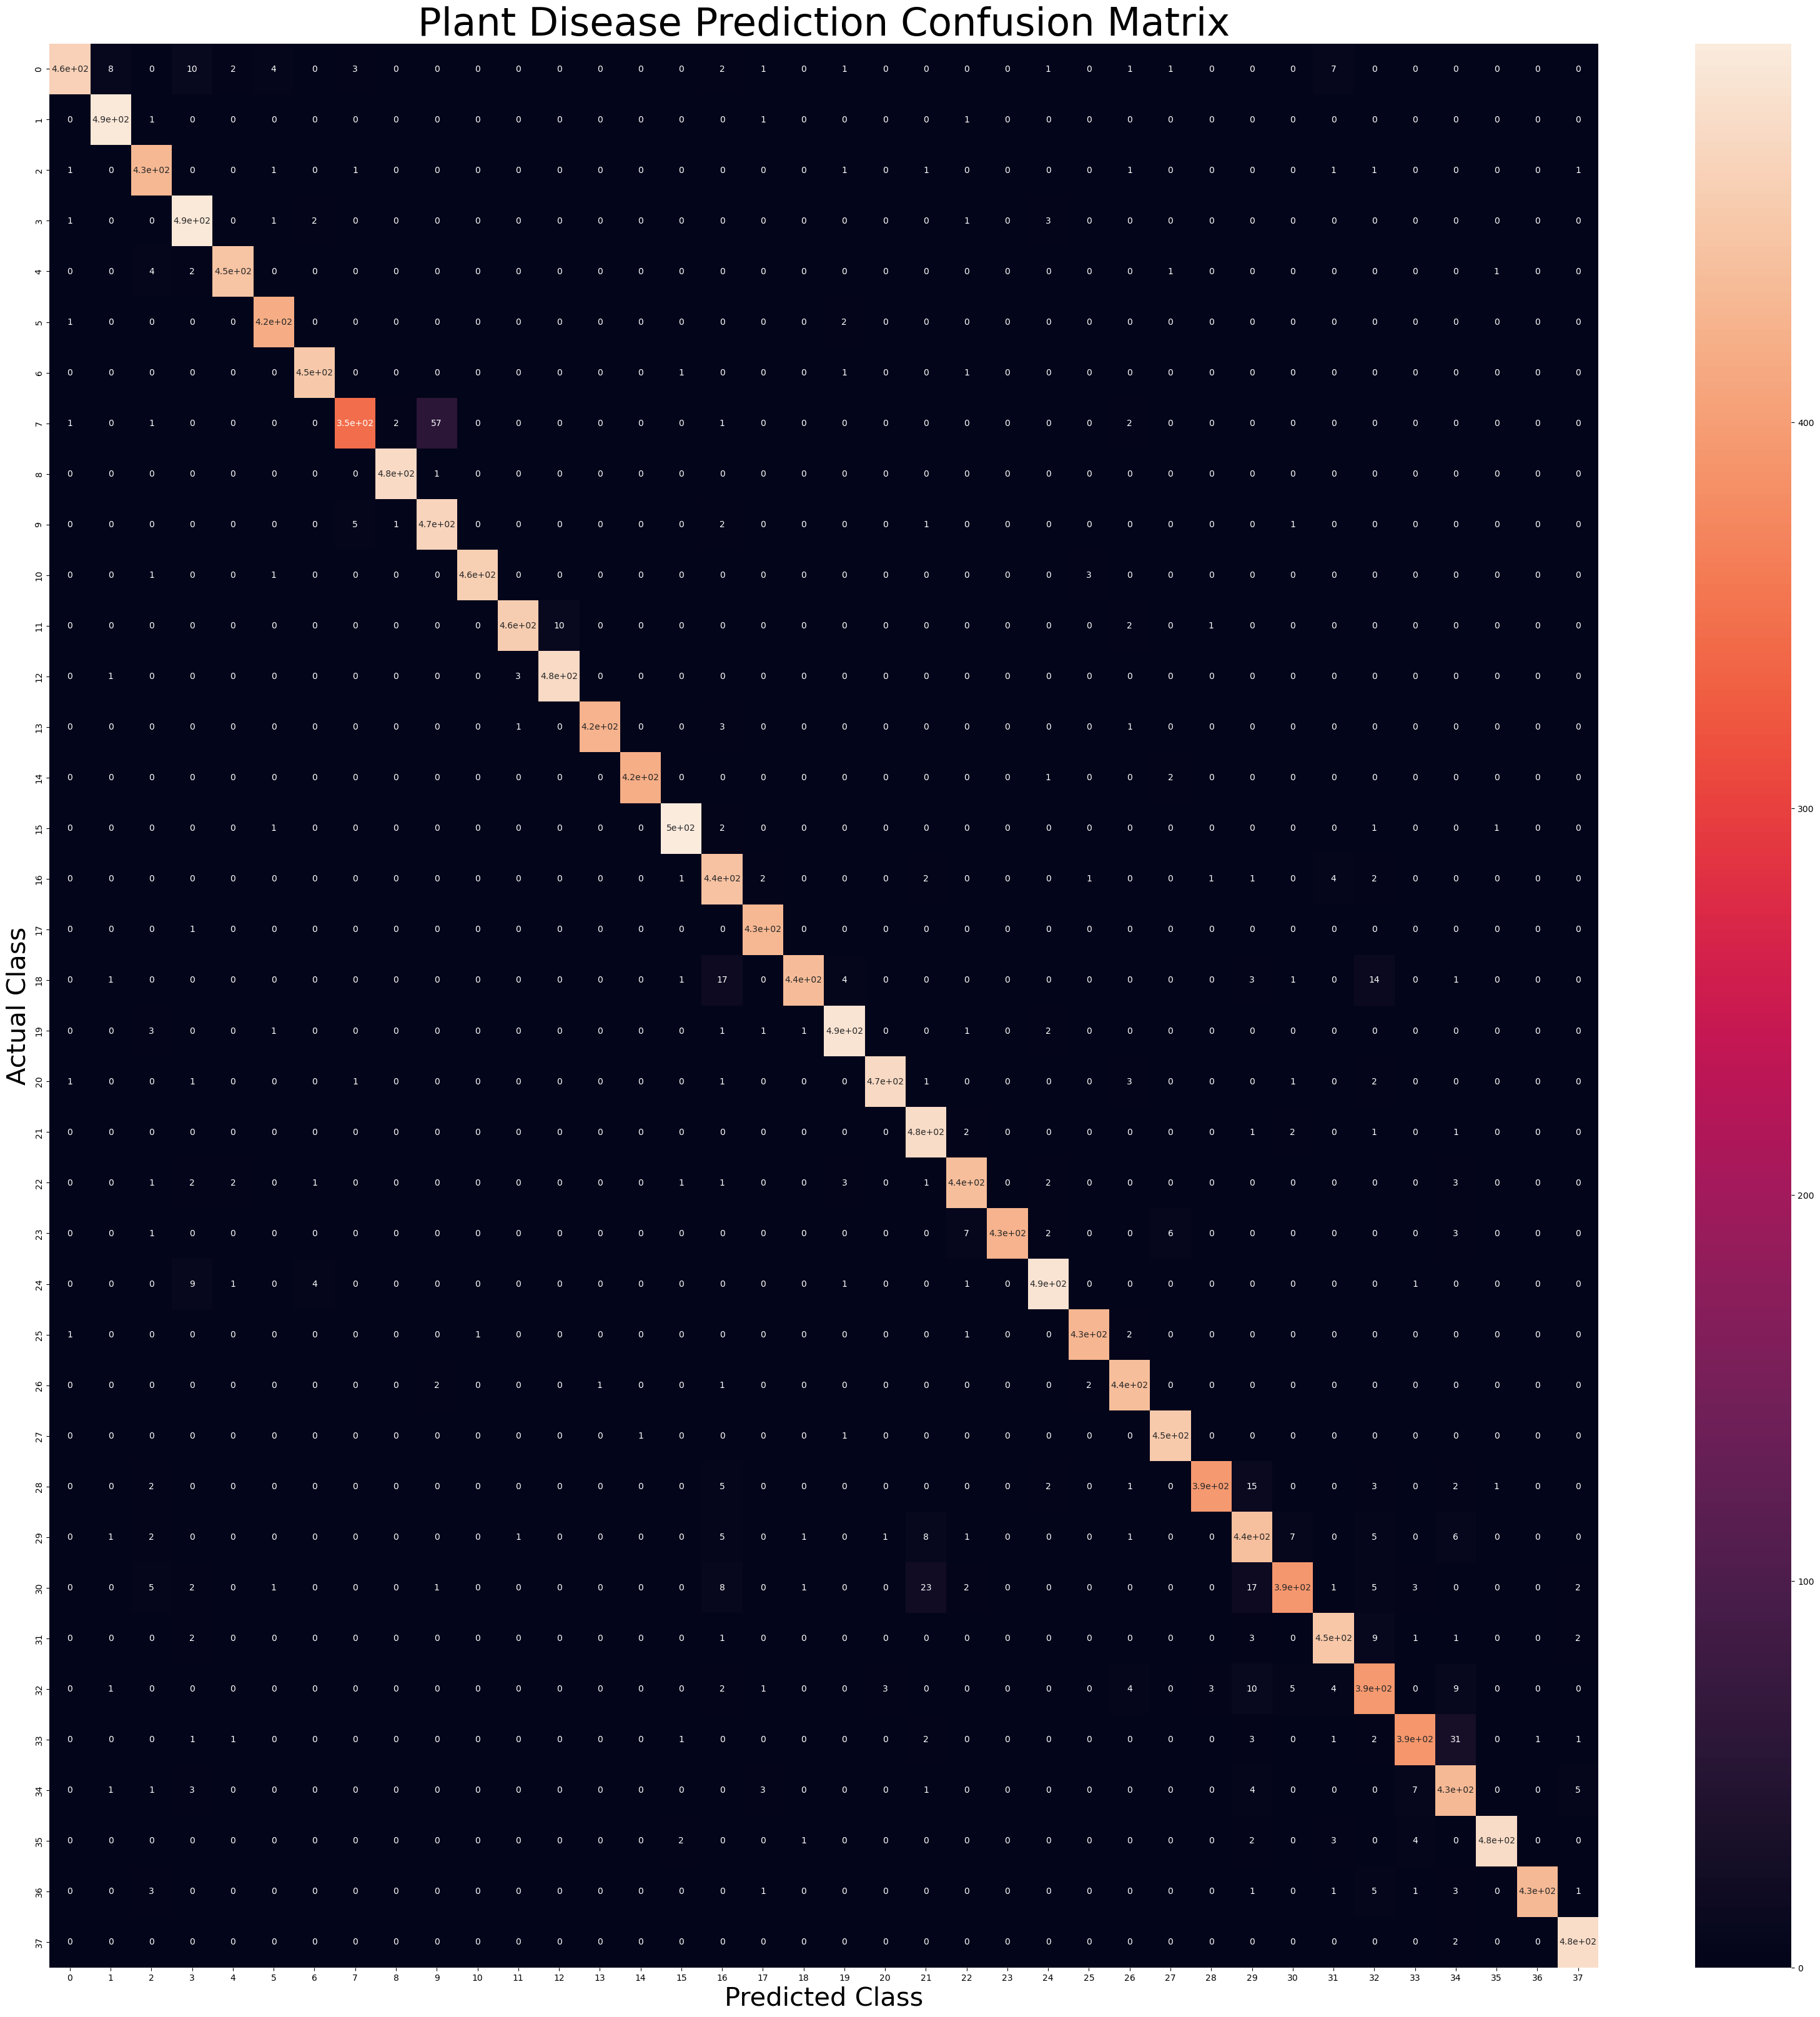

In [87]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=30)
plt.ylabel("Actual Class",fontsize=30)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=45)
plt.show()

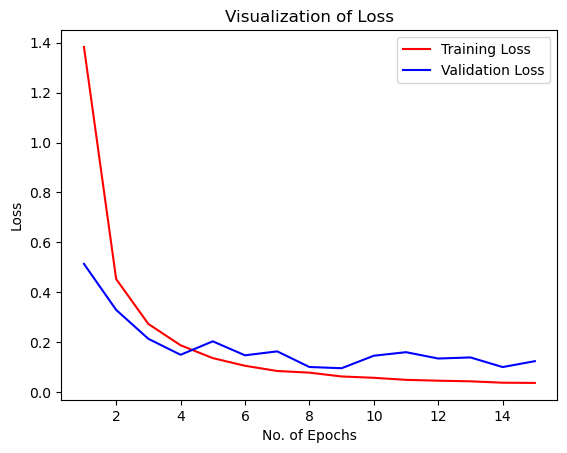

In [89]:
epochs = [i for i in range(1, 16)]
plt.plot(epochs, training_history.history['loss'], color='red', label='Training Loss')
plt.plot(epochs, training_history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Loss")
plt.legend()
plt.show()


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.92      0.95       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.95      0.98      0.96       440
                                   Apple___healthy       0.94      0.98      0.96       502
                               Blueberry___healthy       0.99      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.84      0.90       410
                       Corn_(maize)___Common_rust_       0.99      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.88      0.98      0.

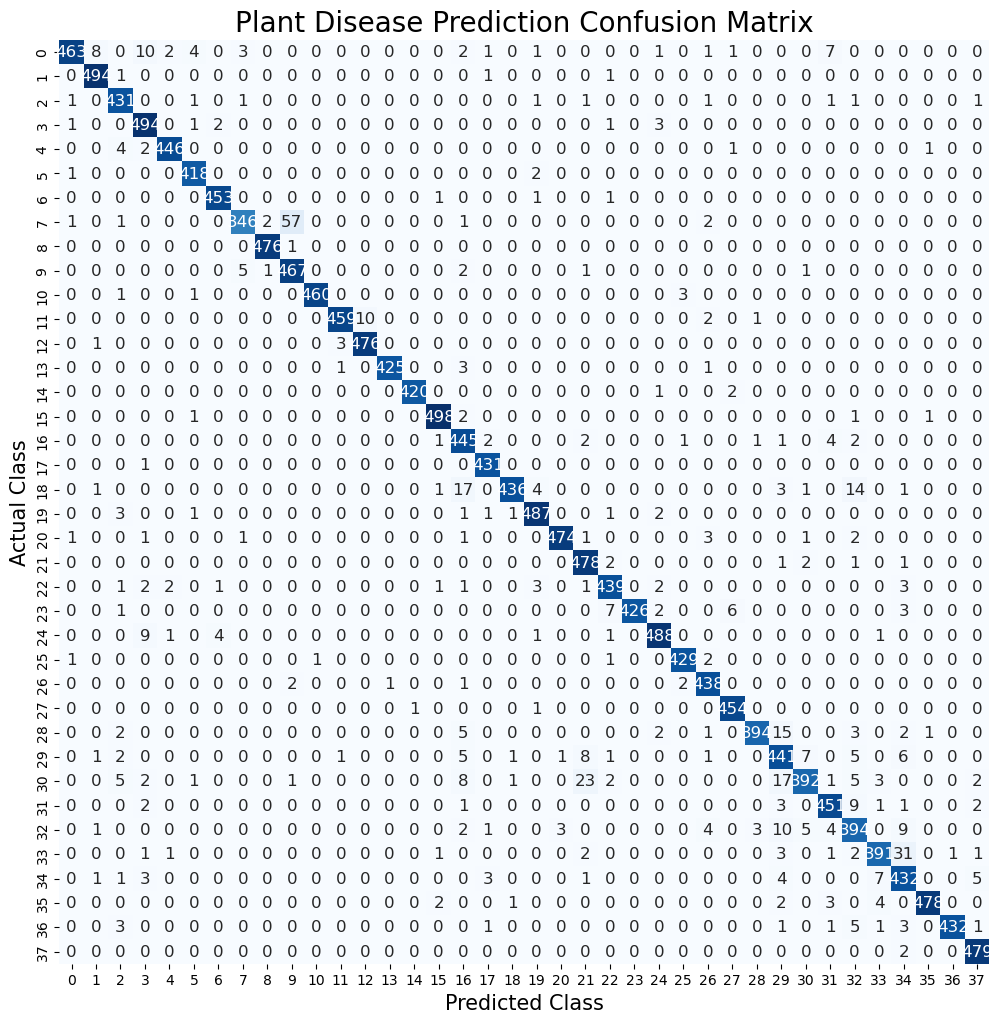

In [90]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Print the classification report
print(classification_report(y_true, predicted_categories, target_names=class_name))

# Compute the confusion matrix
cm = confusion_matrix(y_true, predicted_categories)

# Print the confusion matrix and its shape
print(cm, cm.shape)

# Plot the confusion matrix as numbers only
plt.figure(figsize=(12, 12))  # Adjusted the figure size for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12})  # fmt='d' ensures integer format
plt.xlabel("Predicted Class", fontsize=15)
plt.ylabel("Actual Class", fontsize=15)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize=20)
plt.show()


In [91]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Print the classification report
print(classification_report(y_true, predicted_categories, target_names=class_name))

# Compute the confusion matrix
cm = confusion_matrix(y_true, predicted_categories)

# Print the confusion matrix and its shape
print(cm, cm.shape)


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.92      0.95       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.95      0.98      0.96       440
                                   Apple___healthy       0.94      0.98      0.96       502
                               Blueberry___healthy       0.99      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.84      0.90       410
                       Corn_(maize)___Common_rust_       0.99      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.88      0.98      0.

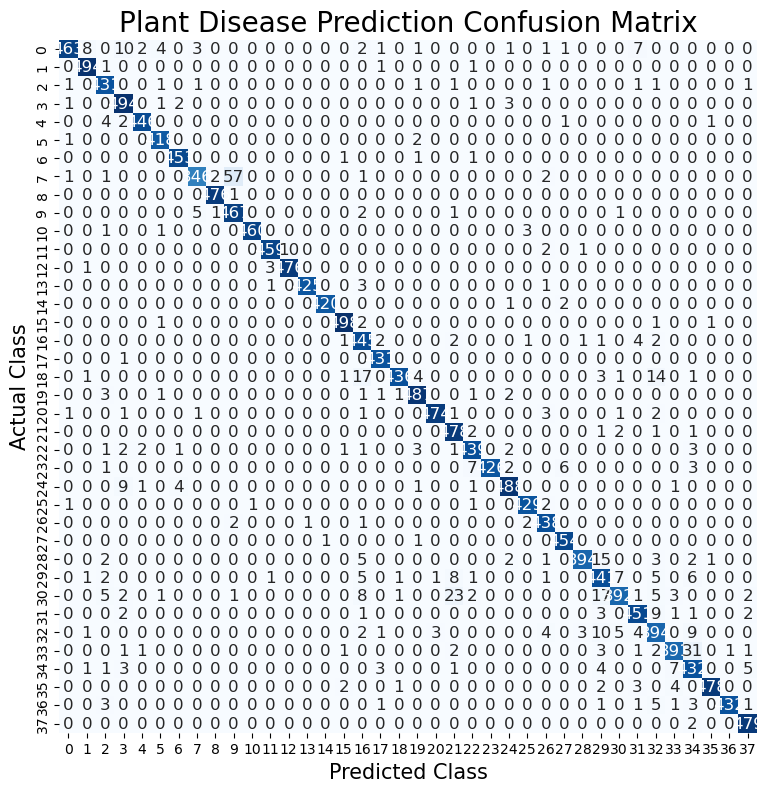

In [92]:
# Plot the confusion matrix as numbers only
plt.figure(figsize=(9,9))  # Adjusted the figure size for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12})  # fmt='d' ensures integer format
plt.xlabel("Predicted Class", fontsize=15)
plt.ylabel("Actual Class", fontsize=15)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize=20)
plt.show()


In [94]:
pip install scikit-learn


     -------------------------------------- 14.9/14.9 MB 363.9 kB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\IMAN DAS\\anaconda3\\Lib\\site-packages\\~umpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



550/550 ━━━━━━━━━━━━━━━━━━━━ 70s 127ms/step


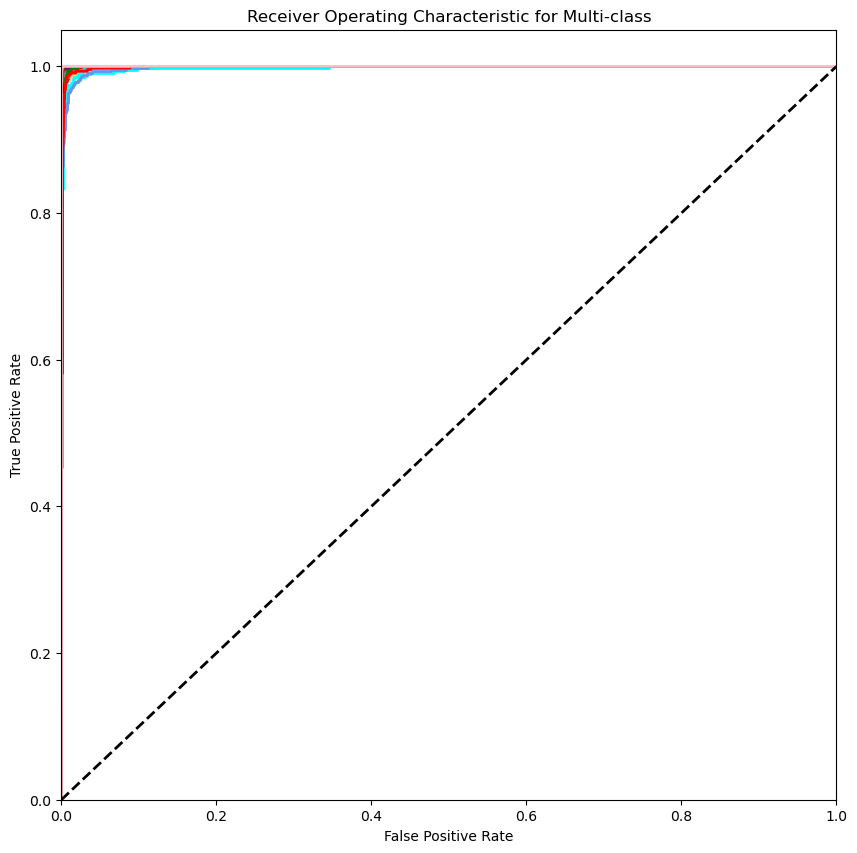

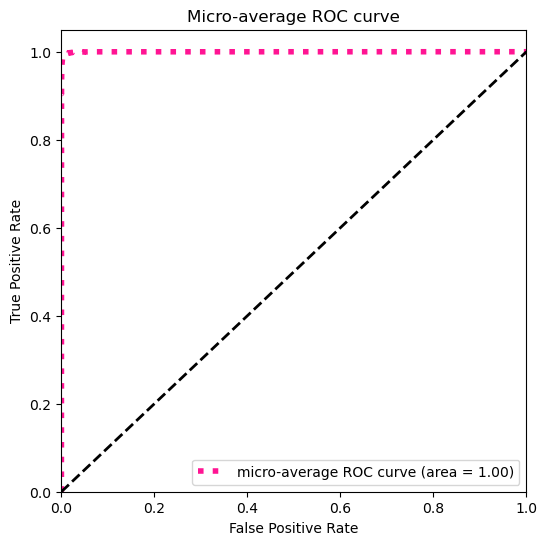

In [99]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import numpy as np

# Calculate ROC curve and ROC AUC for each class
n_classes = len(class_name)
y_test = np.concatenate([y for x, y in test_set], axis=0)
y_score = model.predict(test_set)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure(figsize=(10, 10))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(class_name[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-class')

plt.show()

# Plot ROC curve for micro-average
plt.figure(figsize=(6, 6))
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4,
         label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC curve')
plt.legend(loc="lower right")
plt.show()

Found 17572 files belonging to 38 classes.
550/550 ━━━━━━━━━━━━━━━━━━━━ 73s 133ms/step


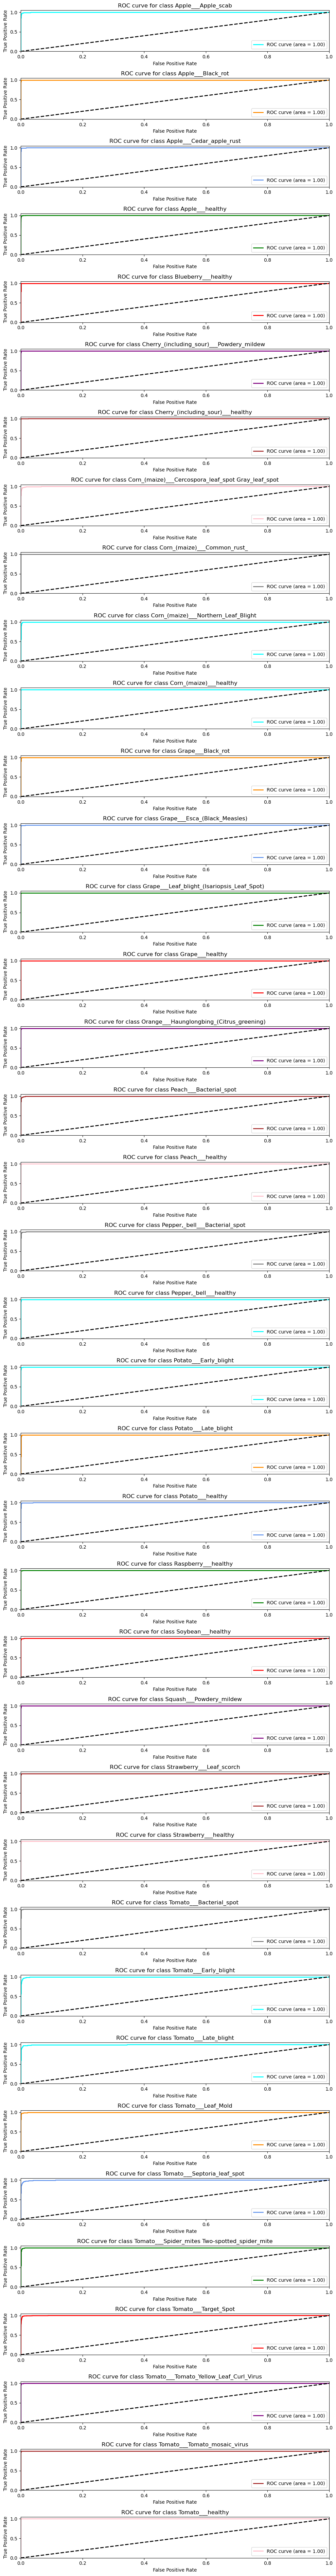

In [100]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import numpy as np

# Assuming the previous parts of your script are the same, starting from loading the test set
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

# Get class names
class_name = test_set.class_names

# Predict probabilities for the test set
y_test = np.concatenate([y for x, y in test_set], axis=0)
y_score = model.predict(test_set)

# Number of classes
n_classes = len(class_name)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting multi-vertical ROC curves
fig, axs = plt.subplots(n_classes, 1, figsize=(10, 2 * n_classes))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan'])

for i, color in zip(range(n_classes), colors):
    axs[i].plot(fpr[i], tpr[i], color=color, lw=2,
                label='ROC curve (area = {1:0.2f})'.format(class_name[i], roc_auc[i]))
    axs[i].plot([0, 1], [0, 1], 'k--', lw=2)
    axs[i].set_xlim([0.0, 1.0])
    axs[i].set_ylim([0.0, 1.05])
    axs[i].set_xlabel('False Positive Rate')
    axs[i].set_ylabel('True Positive Rate')
    axs[i].set_title('ROC curve for class {}'.format(class_name[i]))
    axs[i].legend(loc="lower right")

plt.tight_layout()
plt.show()
